## Scaling tests of linear algebra operations ##

Setup at NERSC:
```
module load python/3.5-anaconda
cd $SCRATCH/desi/knlcode/knltest/code
python linalg-scaling.py

srun -n 1 -c 24 python linalg-scaling.py
srun -n 1 -c 256 python linalg-scaling.py

export OMP_NUM_THREADS=256
srun -n 1 -c 256 --cpu_bind=cores python linalg-scaling.py

```

In [2]:
%pylab inline
import numpy as np
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [3]:
mac = Table.read('data/linalg-scaling/mac.txt', format='ascii')
hsw = Table.read('data/linalg-scaling/hsw.txt', format='ascii')
knl = Table.read('data/linalg-scaling/knl.txt', format='ascii')

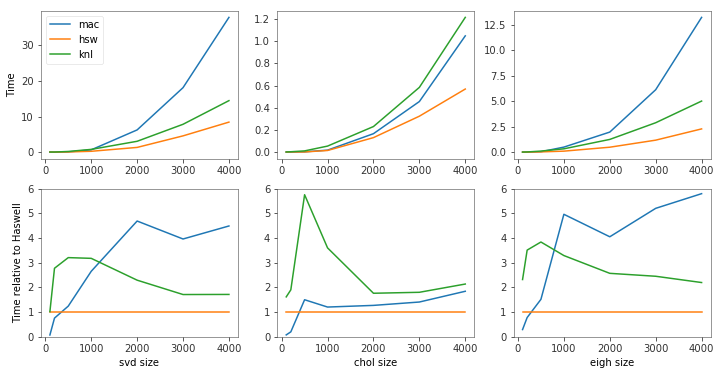

In [5]:
figure(figsize=(12,6))
for i, method in enumerate(['svd', 'chol', 'eigh']):
    subplot(231+i)
    plot(mac['n'], mac[method], label='mac')
    plot(hsw['n'], hsw[method], label='hsw')
    plot(knl['n'], knl[method], label='knl')
    if i == 0:
        ylabel('Time')
        legend(loc='upper left')
    subplot(234+i)
    plot(mac['n'], mac[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)
    plot(hsw['n'], hsw[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)
    plot(knl['n'], knl[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)
    if i == 0:
        ylabel('Time relative to Haswell')

